# Predicting Revenue from Parking Citations in Baltimore
Capstone Project for Springboard Data Science Bootcamp

Tamara Monge

### Section 3: Feature Selection and Preparation

In [1]:
# Import standard libraries
# analsysis
import pandas as pd
import scipy.stats as stats
from datetime import datetime, date
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all" 

# plotting
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
# Import cleaned data
df = pd.read_csv('persistence/cleaned_data_2018-01-03.csv', parse_dates=True, index_col='date')

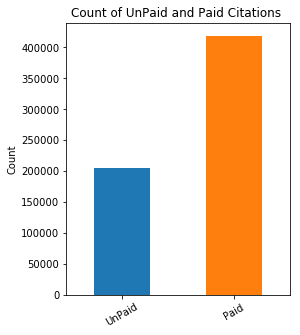

In [3]:
# Select Features (Explore Feature Colinearity)
_ = df['paid'].value_counts(ascending=True).plot(kind='bar', figsize=(4,5))
_ = plt.title('Count of UnPaid and Paid Citations ')
_ = plt.xticks([0,1], ['UnPaid', 'Paid'], rotation=30)
_ = plt.ylabel('Count')

In [4]:
print(round(100*df['paid'].sum()/len(df['paid'])),'% of accounts have been paid down.')

67.0 % of accounts have been paid down.


Later in this project we will build machine learning models to predict whether or not a citation will be paid ($y$ = `paid`) based on our other variables ($X$ = [`fine`, `desc`, `instate`, `make`, `quad`, `yr`, `mo`, `day`, `hr`]. With this in mind, let's determine if there exist dependencies between the predictive and predicted variables we will use in our models. 

Let's first approach this visually by inspecting countplots of the paid and unpaid citations for each our predictive variables.

In [5]:
print(round(100*df['instate'].sum()/len(df['instate'])),'% of offenses were committed by instate vehicles')

86.0 % of offenses were committed by instate vehicles


Let's look at countplots

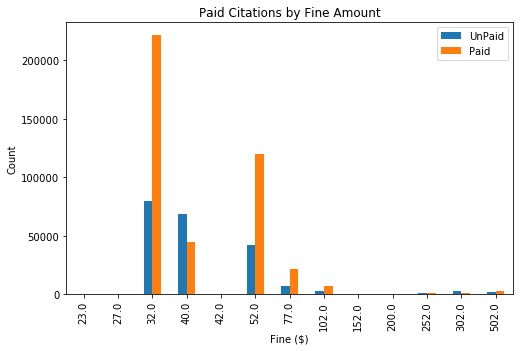

In [6]:
_ = pd.crosstab(df['fine'], df['paid']).plot(kind='bar', figsize=(8,5))
_ = plt.title('Paid Citations by Fine Amount')
_ = plt.xlabel('Fine ($)')
_ = plt.ylabel('Count')
_ = plt.legend(['UnPaid', 'Paid'])

- `fine` appears to be a good predictive variable because most citations with a fine of \$40 or \$302 go unpaid, while most citations with a fine of any other amount are paid. 

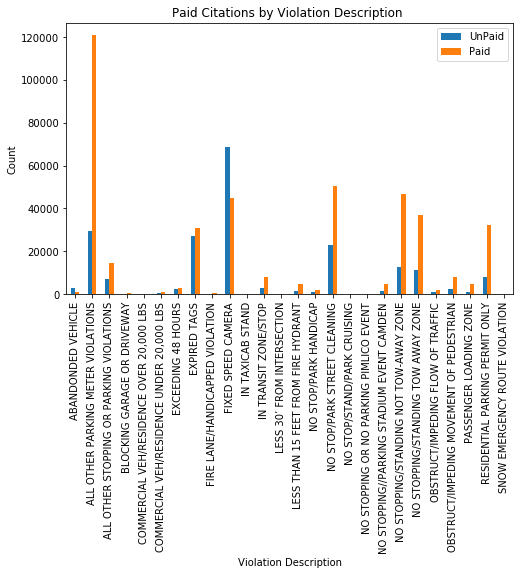

In [7]:
_ = pd.crosstab(df['desc'], df['paid']).plot(kind='bar', figsize=(8,5))
_ = plt.title('Paid Citations by Violation Description ')
_ = plt.xlabel('Violation Description')
_ = plt.ylabel('Count')
_ = plt.legend(['UnPaid', 'Paid'])

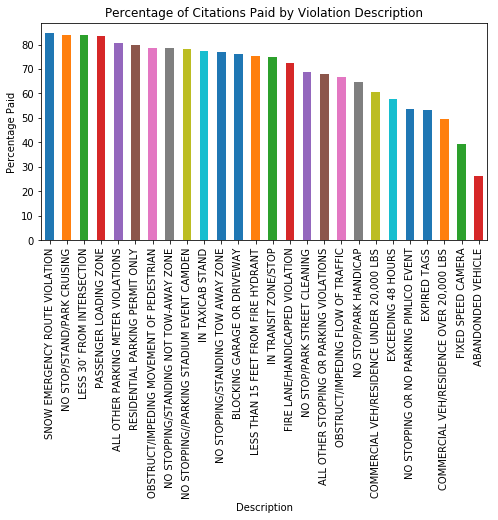

In [8]:
desc_means = df.groupby('desc').mean()
fig = plt.figure(figsize=(8,4))
_ = (desc_means['paid'].sort_values(ascending=False)*100).plot(kind='bar')
_ = plt.xlabel('Description')
_ = plt.ylabel('Percentage Paid')
_ = plt.title('Percentage of Citations Paid by Violation Description')

- `desc` appears to be a good predictive variable because most citations with of `FIXED SPEED CAMERA` or `ABANDONDED VEHICLE` go unpaid, while most citations with any other description are paid.

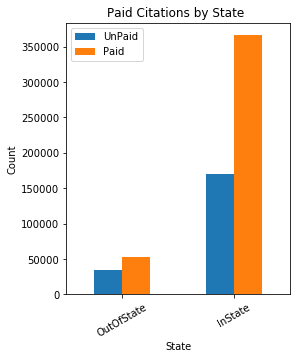

In [9]:
_ = pd.crosstab(df['instate'], df['paid']).plot(kind='bar', figsize=(4,5))
_ = plt.title('Paid Citations by State ')
_ = plt.xlabel('State')
_ = plt.xticks([0,1], ['OutOfState','InState'], rotation=30)
_ = plt.ylabel('Count')
_ = plt.legend(['UnPaid', 'Paid'])

- `instate` appears to be a less powerful predictor than other variables because most citations issued to both `OutOfState` and `InState` vehicles are paid.   

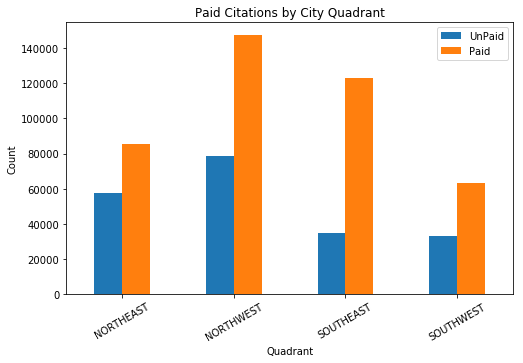

In [10]:
_ = pd.crosstab(df['quad'], df['paid']).plot(kind='bar', figsize=(8,5))
_ = plt.title('Paid Citations by City Quadrant')
_ = plt.xlabel('Quadrant')
_ = plt.xticks(rotation=30)
_ = plt.ylabel('Count')
_ = plt.legend(['UnPaid', 'Paid'])

- `quad` appears to be a less powerful predictor than other variables because most citations are paid, regardless of the quadrant in which they were issued.

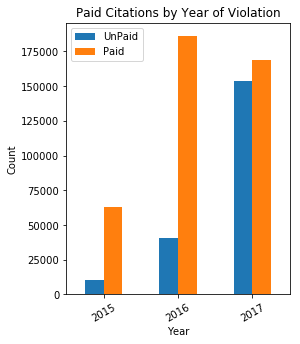

In [11]:
_ = pd.crosstab(df['yr'],df['paid']).plot(kind='bar', figsize=(4,5))
_ = plt.title('Paid Citations by Year of Violation')
_ = plt.xlabel('Year')
_ = plt.xticks(rotation=30)
_ = plt.ylabel('Count')
_ = plt.legend(['UnPaid', 'Paid'])

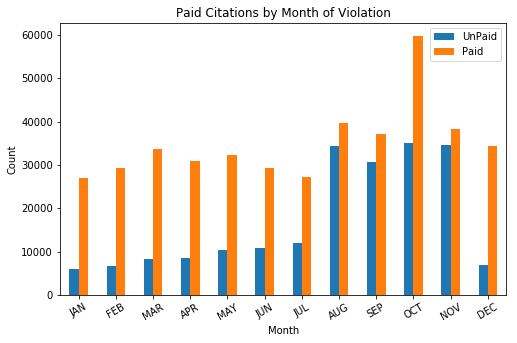

In [12]:
_ = pd.crosstab(df['mo'], df['paid']).plot(kind='bar', figsize=(8,5))
_ = plt.title('Paid Citations by Month of Violation')
_ = plt.xlabel('Month')
_ = plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11], ['JAN','FEB','MAR','APR','MAY','JUN','JUL','AUG','SEP','OCT','NOV','DEC'], rotation=30)
_ = plt.ylabel('Count')
_ = plt.legend(['UnPaid', 'Paid'])

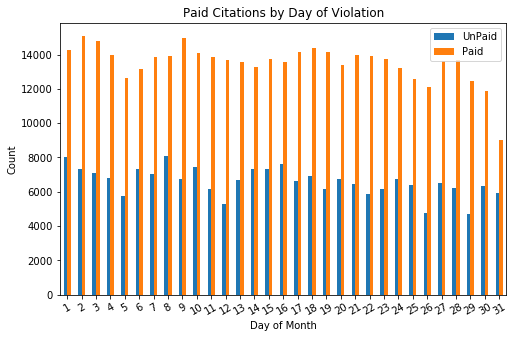

In [13]:
_ = pd.crosstab(df['day'], df['paid']).plot(kind='bar', figsize=(8,5))
_ = plt.title('Paid Citations by Day of Violation')
_ = plt.xlabel('Day of Month')
_ = plt.xticks(rotation=30)
_ = plt.ylabel('Count')
_ = plt.legend(['UnPaid', 'Paid'])

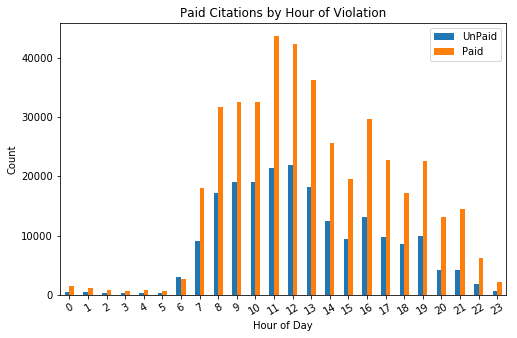

In [14]:
_ = pd.crosstab(df['hr'], df['paid']).plot(kind='bar', figsize=(8,5))
_ = plt.title('Paid Citations by Hour of Violation')
_ = plt.xlabel('Hour of Day')
_ = plt.xticks(rotation=30)
_ = plt.ylabel('Count')
_ = plt.legend(['UnPaid', 'Paid'])

- `hr` appears to be the only good predictor of a temporal nature because the majority of citations issued in the `6 o'clock hour` go unpaid while citations issued at during any other hour of the day tend to be paid.

To explore dependencies between our variables in a quantitative manner, let's use the chi-square test of independence. For this test, the null hypothesis is that the variables are independent. The `scipy.stats.stats.chi2_contingency()` function returns the chi-square value as well as the p-value and the degrees of freedom. If the chi-square value is greater than the critical value for the degrees of freedom in the calculation, then we reject the null hypothesis. In other words, if the chi-square value is large enough, we reject the null and conclude that the variables in question are dependent. We will choose a significance level of $\alpha$ = 0.01.

In [15]:
stats.chi2_contingency(pd.crosstab(df['paid'], df['instate']))[:3]

(2259.4150252230115, 0.0, 1)

The critical chi-square value for $\alpha$ = 0.01 and 1 degree of freedom is 6.6. Our computed value is greater than the critical value and thus we conlcude that `paid` and `instate` are dependent. 

In [16]:
stats.chi2_contingency(pd.crosstab(df['paid'], df['make']))[:3]

(11441.85110709634, 0.0, 316)

The critical chi-square value for $\alpha$ = 0.01 and 316 degrees of freedom is 377.4. Our computed value is greater than the critical value and thus we conlcude that `paid` and `make` are dependent. 

In [17]:
stats.chi2_contingency(pd.crosstab(df['paid'], df['quad']))[:3]

(12425.440650685199, 0.0, 3)

The critical chi-square value for $\alpha$ = 0.01 and 3 degrees of freedom is 11.3. Our computed value is greater than the critical value and thus we conlcude that `paid` and `quad` are dependent. 

In [18]:
stats.chi2_contingency(pd.crosstab(df['paid'], df['yr']))[:3]

(67422.665217726462, 0.0, 2)

The critical chi-square value for $\alpha$ = 0.01 and 2 degrees of freedom is 9.2. Our computed value is greater than the critical value and thus we conlcude that `paid` and `yr` are dependent. 

In [19]:
stats.chi2_contingency(pd.crosstab(df['paid'], df['mo']))[:3]

(37408.744235353894, 0.0, 11)

The critical chi-square value for $\alpha$ = 0.01 and 11 degrees of freedom is 24.7. Our computed value is greater than the critical value and thus we conlcude that `paid` and `mo` are dependent.

In [20]:
stats.chi2_contingency(pd.crosstab(df['paid'], df['day']))[:3]

(1873.4604505743546, 0.0, 30)

The critical chi-square value for $\alpha$ = 0.01 and 30 degrees of freedom is 50.9. Our computed value is greater than the critical value and thus we conlcude that `paid` and `day` are dependent. 

In [21]:
stats.chi2_contingency(pd.crosstab(df['paid'], df['hr']))[:3]

(4780.2825841613176, 0.0, 23)

The critical chi-square value for $\alpha$ = 0.01 and 23 degrees of freedom is 41.6. Our computed value is greater than the critical value and thus we conlcude that `paid` and `hr` are dependent. 

In [22]:
stats.chi2_contingency(pd.crosstab(df['paid'], df['desc']))[:3]

(70747.505192591634, 0.0, 25)

The critical chi-square value for $\alpha$ = 0.01 and 25 degrees of freedom is 44.3. Our computed value is greater than the critical value and thus we conlcude that `paid` and `desc` are dependent. 

In [23]:
stats.chi2_contingency(pd.crosstab(df['paid'], df['fine']))[:3]

(52988.558981154041, 0.0, 12)

The critical chi-square value for $\alpha$ = 0.01 and 12 degrees of freedom is 26.2. Our computed value is greater than the critical value and thus we conlcude that `paid` and `fine` are dependent. 

Let's Prepare the Feature Array and the Target Vector

In [24]:
# encode categorical variables: make, code, year, month, day, hour, quadrant
df_with_dummies = pd.get_dummies(df, columns=['make', 'desc', 'yr', 'mo', 'day', 'hr', 'quad'], drop_first=True)
df_with_dummies.drop(['date.1', 'cit', 'tag' ,'state', 'add', 'code', 'bal', 'ofine', 'openalty', 'paid', 'loc', 'lon', 'lat', 'lonlat'], axis=1, inplace=True)
df_with_dummies.head()
df_with_dummies.columns

,fine,instate,make_0TH,make_10,make_11,make_11:,make_12/,make_1HR,make_201,make_2HR,...,hr_17,hr_18,hr_19,hr_20,hr_21,hr_22,hr_23,quad_NORTHWEST,quad_SOUTHEAST,quad_SOUTHWEST
date,,,,,,,,,,,,,,,,,,,,,
2016-09-17 11:38:00,32.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2016-08-02 13:05:00,32.0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2016-08-02 12:03:00,32.0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2016-08-02 11:59:00,32.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2016-10-09 11:24:00,77.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


Index(['fine', 'instate', 'make_0TH', 'make_10 ', 'make_11', 'make_11:',
       'make_12/', 'make_1HR', 'make_201', 'make_2HR',
       ...
       'hr_17', 'hr_18', 'hr_19', 'hr_20', 'hr_21', 'hr_22', 'hr_23',
       'quad_NORTHWEST', 'quad_SOUTHEAST', 'quad_SOUTHWEST'],
      dtype='object', length=412)

In [25]:
# set model variables
y = df['paid']
X = df_with_dummies  # instate, + dummies for make, desc, yr, mo, day, hr, and quad

In [26]:
# save feature array and target vector to new file for faster accessibility in the future
filename_X = 'persistence/features_' + str(date.today()) + '.csv'
filename_y = 'persistence/target_' + str(date.today()) + '.csv'
X.to_csv(filename_X, date_format='%Y-%m-%d %H:%M:%S')
y.to_csv(filename_y, date_format='%Y-%m-%d %H:%M:%S')

In [27]:
fine = pd.Series(df['fine'])
fine.to_csv('persistence/fine_' + str(date.today()) + '.csv')